In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('train.csv')

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
agemean = round(data['Age'].mean())

In [0]:
data['Age'].fillna(agemean, inplace = True)

In [0]:
del data['Cabin']
del data['Name']
del data['Ticket']
del data['PassengerId']

In [0]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [11]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [0]:
y = data['Survived'].copy()
x = data.copy()
del x['Survived']

In [24]:
print(x)
print(y)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         3    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         3  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         3    male  35.0      0      0   8.0500        S
..      ...     ...   ...    ...    ...      ...      ...
886       2    male  27.0      0      0  13.0000        S
887       1  female  19.0      0      0  30.0000        S
888       3  female  30.0      1      2  23.4500        S
889       1    male  26.0      0      0  30.0000        C
890       3    male  32.0      0      0   7.7500        Q

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

categorical = ['Sex', 'Embarked']
numerical = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
col_trans = make_column_transformer((OneHotEncoder(handle_unknown = "error",drop = "first"),categorical),(MinMaxScaler(),numerical))
trans_x = col_trans.fit_transform(x)
trans_x = pd.DataFrame(trans_x)
# print(x)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(trans_x, y, test_size = 0.2, random_state = 43, stratify = y)

### Using Mathew Correlation Coeffient for scoring

In [0]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import matthews_corrcoef as mcoeff
from matplotlib import pyplot as plt

In [46]:
classif = knn(n_neighbors=5)

classif.fit(x_train, y_train)

test_predict = classif.predict(x_test)
sc = mcoeff(test_predict,y_test)
print(sc)

0.544551646612115


37
0.6637445429046149


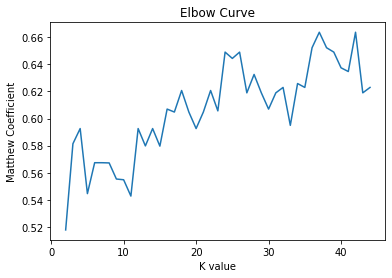

In [55]:
scores = []
best_k = 0
max_coeff = -1
for i in range(2,45):
  clf = knn(n_neighbors=i)
  clf.fit(x_train,y_train)
  
  test_predict = clf.predict(x_test)
  curr_coeff = mcoeff(test_predict,y_test)
  if(max_coeff < curr_coeff):
    best_k = i
    max_coeff = max(curr_coeff,max_coeff)
  scores.append(curr_coeff)
plt.plot(range(2,45),scores)
plt.xlabel('K value')
plt.ylabel('Matthew Coefficient')
plt.title('Elbow Curve')
print(best_k)
print(max_coeff)

###Therefore the best k value is 37 and it gives a Matthews Coefficient of 0.66 which is pretty good.